In [1]:
!pip install torch==2.3.1 torchvision==0.18.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 506.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
import torch
print(torch.__version__)


2.3.1+cu121


In [2]:
from google.colab import files

uploaded = files.upload()


Saving model.py to model.py


In [4]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from model import YOLOv8  # Import the YOLOv8 model

# Use CPU
device = torch.device('cuda')

# Data Loading
train_dataset = datasets.MNIST(
    root='data', train=True, download=True, transform=ToTensor())
train_loader = DataLoader(train_dataset, batch_size=8,
                          shuffle=True, num_workers=0)

# Initialize Model, Loss Function, and Optimizer
model = YOLOv8(nc=10).to(device)  # Set nc to 10 for MNIST (10 classes)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Training Loop
for epoch in range(10):  # Number of epochs
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.4f}')

# Save the trained model
torch.save(model.state_dict(), 'yolov8_model.pth')


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4400848.26it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 126415.83it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 241539.48it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4532602.61it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Epoch 1, Loss: 0.2756
Epoch 2, Loss: 0.1115
Epoch 3, Loss: 0.0729
Epoch 4, Loss: 0.0560
Epoch 5, Loss: 0.0424
Epoch 6, Loss: 0.0345
Epoch 7, Loss: 0.0298
Epoch 8, Loss: 0.0255
Epoch 9, Loss: 0.0211
Epoch 10, Loss: 0.0211


In [1]:
import torch

# Check if CUDA (GPU) is available
print("CUDA Available:", torch.cuda.is_available())

# Check the GPU device name
if torch.cuda.is_available():
    print("GPU Device Name:", torch.cuda.get_device_name(0))
else:
    print("No GPU detected.")


CUDA Available: True
GPU Device Name: Tesla T4


In [5]:
import torch

# Define the device (e.g., 'cuda' for GPU or 'cpu' for CPU)
device = torch.device('cuda')

# Load the saved model weights
model.load_state_dict(torch.load('yolov8_model.pth', map_location=device))

# Move the model to the appropriate device
model.to(device)


YOLOv8(
  (backbone): Sequential(
    (0): Conv(
      (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU()
    )
    (1): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU()
    )
    (2): C2f(
      (conv1): Conv(
        (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): ReLU()
      )
      (conv2): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): ReLU()
      )
      (conv3): Conv(
        (conv): C

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load the model and weights
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = YOLOv8(nc=10)
model.load_state_dict(torch.load('yolov8_model.pth', map_location=device))
model.to(device)
model.eval()

def predict_and_display_image(image_path):
    # Define transformations to resize the image to 28x28 and convert to tensor
    transform = transforms.Compose([
        transforms.Resize((28, 28)),  # Resize to match MNIST input size
        transforms.Grayscale(),       # Ensure the image is in grayscale
        transforms.ToTensor(),        # Convert to tensor
    ])

    # Load and preprocess the image
    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    image = image.to(device)    # Move the image to the same device as the model

    # Make predictions
    with torch.no_grad():
        outputs = model(image)

    # Convert logits to probabilities
    probabilities = F.softmax(outputs, dim=1)

    # Get the predicted class index
    _, predicted_class = torch.max(probabilities, dim=1)
    predicted_class = predicted_class.item()

    # Define class labels
    class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    predicted_label = class_labels[predicted_class]

    # Print results
    print("Probabilities:", probabilities)
    print(f'Predicted class index: {predicted_class}')
    print(f'Predicted class label: {predicted_label}')

    # Display the image with the predicted label
    def display_image_with_prediction(image_path, predicted_label):
        image = Image.open(image_path)
        plt.imshow(image, cmap='gray')
        plt.title(f'Predicted Label: {predicted_label}')
        plt.axis('off')  # Turn off axis
        plt.show()

    # Show the image with the predicted label
    display_image_with_prediction(image_path, predicted_label)


Probabilities: tensor([[6.6487e-03, 4.7187e-03, 1.0493e-02, 6.9298e-02, 1.8393e-05, 7.7994e-01,
         6.9278e-03, 4.1710e-03, 1.1684e-01, 9.4650e-04]], device='cuda:0')
Predicted class index: 5
Predicted class label: 5


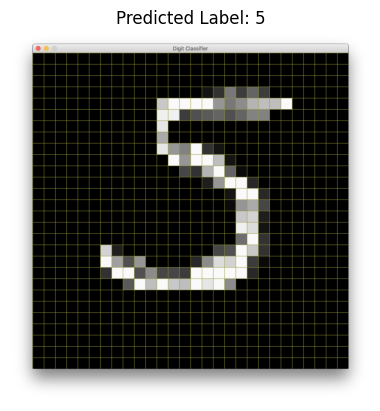

Probabilities: tensor([[2.4284e-09, 2.5645e-08, 1.0960e-06, 1.0000e+00, 2.2996e-07, 7.2412e-09,
         1.0464e-10, 3.2026e-08, 2.9028e-10, 3.8170e-09]], device='cuda:0')
Predicted class index: 3
Predicted class label: 3


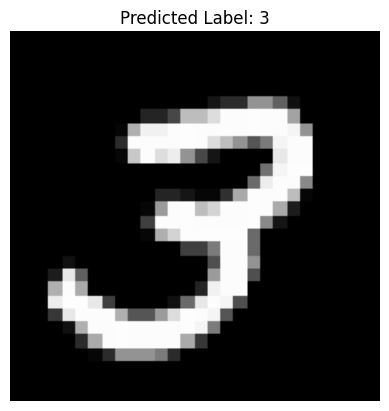

In [24]:
# Example usage
predict_and_display_image('/content/VChE0.png')
predict_and_display_image('/content/images.png')
